# Fits to UHECR data

Fitting both the arrival direction and joint models to the publicly available data form the Pierre Auger observatory. This notebook goes through the case of the SBG catalogue, but the case for 2FHL and Swift-BAT catalogues is exactly the same just changing the catalogue label.
<br>
<br>
*This code is used to produce the data shown in Figures 10, 11 and 12 in Capel & Mortlock (2019).
See the separate notebook in this directory for the actual plotting of figures*.

In [1]:
from fancy import Data, Model, Analysis
from fancy.detector.auger2014 import detector_properties

/Users/fran/projects/bayes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/fran/projects/bayes/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
# Define data files
source_file = '../data/sourcedata.h5'
uhecr_file = '../data/UHECRdata.h5'
table_file = '../data/tables_SBG_23.h5'

# Define output for arrival direction and joint models respectively
arrival_output_file = 'output/arrival_fit.h5'
joint_output_file = 'output/joint_fit.h5'

# Define stan path
stan_path = '../stan/'

# Random seed for reproducibility
random_seed = 19920715

## Data

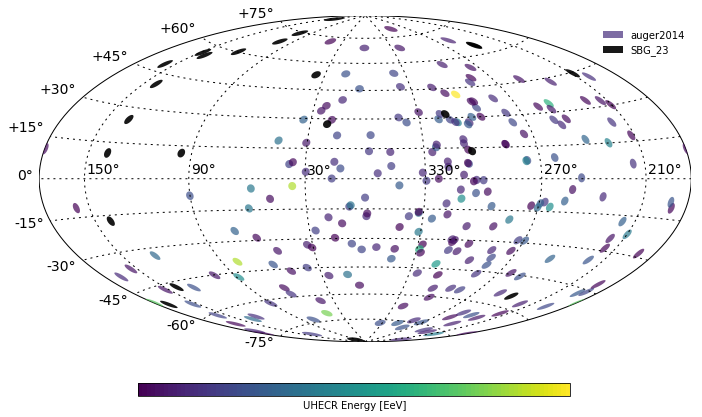

In [3]:
data = Data()
data.add_source(source_file, 'SBG_23')
data.add_uhecr(uhecr_file, 'auger2014')
data.add_detector(detector_properties)
data.show();

## Arrival direction model

In [4]:
arrival_model = stan_path + 'arrival_direction_model.stan'
model = Model(model_filename = arrival_model, include_paths = stan_path)
model.compile()
model.input(Eth = 52) # EeV

Using cached StanModel


In [5]:
# What is happening 
summary = b'Fit of the arrival direction model to the Auger data' 
    
# Define an Analysis object to bring together Data and Model objects
analysis = Analysis(data, model, analysis_type = 'joint', 
                    filename = arrival_output_file, summary = summary)

# Define location of pre-computed values used in fits 
# (see relevant notebook for how to make these files) 
# Each catalogue has a file of pre-computed values
analysis.use_tables(table_file)

In [6]:
# Fit the Stan model
fit = analysis.fit_model(chains = 4, iterations = 2000, seed = random_seed)

# Save to analysis file
analysis.save()

n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


## Joint model

In [7]:
joint_model = stan_path + 'joint_model.stan'
model = Model(model_filename = joint_model, include_paths = stan_path)
model.compile()
model.input(Eth = 52) # EeV

Using cached StanModel


In [8]:
# What is happening 
summary = b'Fit of the joint model to the Auger data' 
    
# Define an Analysis object to bring together Data and Model objects
analysis = Analysis(data, model, analysis_type = 'joint', 
                    filename = joint_output_file, summary = summary)

# Define location of pre-computed values used in fits 
# (see relevant notebook for how to make these files) 
# Each catalogue has a file of pre-computed values
analysis.use_tables(table_file)

In [9]:
# Fit the Stan model
fit = analysis.fit_model(chains = 4, iterations = 2000, seed = random_seed)

# Save to analysis file
analysis.save()

n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
